In [16]:
from keras.datasets import reuters
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

seed = 0 
np.random.seed(seed)
tf.random.set_seed(3)
#불러온 데이터를 학습셋과 테스트셋으로 나누기
(X_train, Y_train),(X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

category = np.max(Y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

#데이터 전처리 maxlen은 단어 수를 100개로 맞추라는 의미 
#100개 보다 많으면 나머지는 버리고, 100개 보다 적으면 0으로 채워 넣는다.
#인공지능 학습을 위해선 데이터 형이 동일해야 하기 때문에 진행하는 전처리 과정이다.
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)

#카테고리를 나타내는 결과값들에는 원한 인코딩 처리를 하여 전처리 과정을 마친다.
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test,y_test))

print(f"\n Test Accuracy: {model.evaluate(x_test, y_test)[1]}")


46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
Epoch 1/20
90/90 [==============================] - 6s 61ms/step - loss: 2.5777 - accuracy: 0.3497 - val_loss: 2.1698 - val_accuracy: 0.4488
Epoch 2/20
90/90 [==============================] - 5s 55ms/step - loss: 2.0364 - accuracy: 0.4905 - val_loss: 1.9459 - val_accuracy: 0.5129
Epoch 3/20
90/90 [==============================] - 5s 55ms/step - loss: 1.8524 - accuracy: 0.5218 - val_loss: 1.7821 - val_accuracy: 0.5414
Epoch 4/20
90/90 [==============================] - 5s 55ms/step - loss: 1.7352 - accuracy: 0.5459 - val_loss: 1.7100 - val_accuracy: 0.5632
Epoch 5/20
90/90 [==============================] 

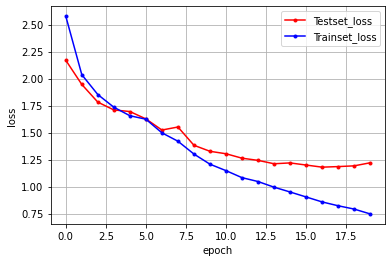

In [14]:

y_vloss = history.history['val_loss']

y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()